# Wind Turbine Induction Generator

### The project aims to design an induction generator for a wind turbine with the below specifications:
####    Rated Power: 250 kW
####    Rated Wind Speed: 14 m/s
####    Rated Turbine Speed: 24.3 rpm
####    Gear Ratio: 31.2
####    Number of Poles: 8
####    Line to line voltage: 400 V
####    Frequency: 50 Hz
####    Rated Speed: 758 rpm
####    Gearbox: (Coupled from wind turbine blade)
####    Insulation Class: F

In [4]:
Power=250000 #Power
p=8 #Pole number
Vph=230 #Phase voltage
f=50 #Frequency
ɳ=0.9 #Target Efficiency 
PF=0.85 #Target Power Factor

### Main Dimensions

#### Mechanical constant is selected from the below figure.

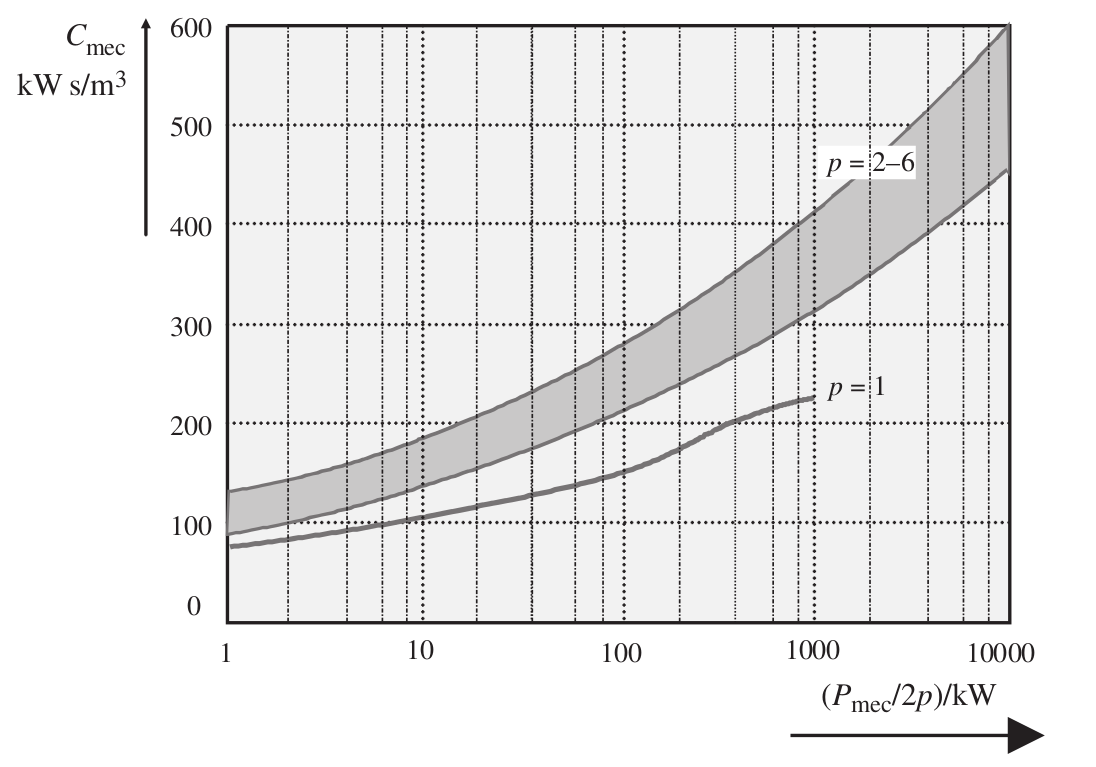

In [2]:
from IPython.display import Image
Image(filename='Images/Cmech.png', width=700, height=700)

In [5]:
import math
Ppp=Power/p #Power per pole
print ('Power per pole =',Ppp,'w')

Power per pole = 31250.0 w


In [53]:
Cmech=200000 #mechanical constant selection
Pp=p/2 #Pole Pair
n_syn=50/Pp #Synchronous speed
print('Synchronous speed =',n_syn,'Hz')

Synchronous speed = 12.5 Hz


In [172]:
from math import pi
X=(pi*(p**(1./3.)))/p #X=L/D
Di=(Power/(Cmech*n_syn*X))**(1./3.) #Rotor Diameter
L=X*Di #Rotor Length
print ('Rotor Diameter = ',Di,'m')
print ('Length =',L,'m')

Rotor Diameter =  0.5030795991604359 m
Length = 0.3951177932233308 m


In [167]:
Airgap=0.18+(0.006*(Power**(0.4))) #Airgap for a 8-pole machine
print ('Airgap =',Airgap*1e-3,'m' ) 

Airgap = 0.0010456199435443284 m


In [173]:
q=3 #Slot per pole per phase number is selected 3
m=3 #3-phase machine
Qs=p*q*m #Total number of slots for stator side
print('Stator slot numbers=',Qs)
Ts=pi*Di/Qs
print ('Slot pitch =',Ts,'m')

Stator slot numbers= 72
Slot pitch = 0.021950988512407267 m


In [174]:
from math import sin
Wp=7/9 #Winding pitch is selected 7/9 to eliminate the 5th harmonic on voltage 
a_elec=pi*p/Qs #Electrical Pole Pitch Angle
pitch=Wp*pi
Kd=(sin(q*a_elec/2))/(q*sin(a_elec/2)) #Distribution Factor
Kp=sin(pitch/2) #Pitch Factor
Kw=Kd*Kp #Winding Factor
print ('Kd =',Kd)
print ('Kp =',Kp)
print ('Kw =',Kw)

Kd = 0.9597950805239389
Kp = 0.9396926207859083
Kw = 0.9019123546349621


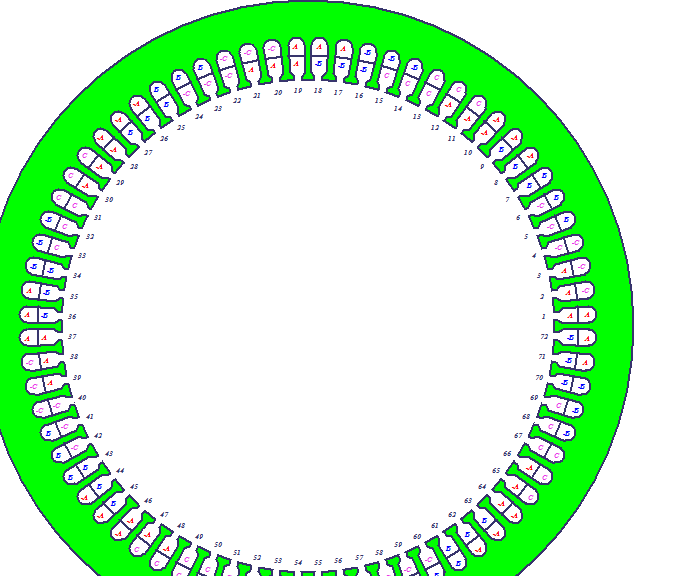

In [160]:
from IPython.display import Image
Image(filename='Images/winding.png', width=700, height=700)

In [175]:
Bg=0.6 #Air gap flux density is chosen 0.8 Tesla. From here we can calculate flux per pole and number of turns per phase.
Tp=(pi*Di)/(p*2) #Pole pitch 
Φp=Bg*Tp*L #Flux per Pole
print ('Pole pitch is',Tp,'m')
print ('Flux per pole =',Φp,'Wb')

Pole pitch is 0.0987794483058327 m
Flux per pole = 0.02341771057825122 Wb


In [176]:
KE=0.98-(0.005*Pp) #Induced voltage over teminal voltage ration.
Kf=1.08 #Tooth saturization factor 
Nph=(KE*Vph)/(4*Kf*Kw*f*Φp)
Ns=Nph/(Pp*q)
print('Calculated turns per phase =',Nph,'turns')
print('Calculated turns per slot =',Ns,'turns')

Calculated turns per phase = 48.39901773308864 turns
Calculated turns per slot = 4.0332514777573865 turns


In [151]:
Nph=48 #Number of turns should be even
Ns=Ns=Nph/(Pp*q)
print('Revised turns per phase =',Nph,'turns')
print('Revised turns per slot =',Ns,'turns')

Revised turns per phase = 48 turns
Revised turns per slot = 4.0 turns


In [115]:
Iph=Power/(PF*ɳ*Vph*3) #Phase current
print('Iph =',Iph,'A')

Iph = 473.61939945060146 A


In [177]:
from math import sqrt
Jcos=8 #recommended current density for an 8-pole (Ampere/mm2)
Aco=Iph/Jcos #required wire cross section (mm2)
dco=sqrt(4*Aco/(pi)) #wire gauge diameter (mm) 
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 59.20242493132518 mm2
Wire gauge diameter 8.68210046974683 mm


In [178]:
a=35 #number of parallel conductors to reduce dco
Aco=Iph/(Jcos*a)
dco=sqrt(4*Aco/(pi))
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 1.6914978551807196 mm2
Wire gauge diameter 1.4675428303973972 mm


In [183]:
dco=1.5 #wire diameter is selected
Kf=0.55 #Fill factor for bog machines
Asu=(pi*(dco**(2.))*a*Ns)/(4*Kf)
print ('Required area of slot =',Asu*1e-6,'m2')

Required area of slot = 0.00045355823431475863 m2


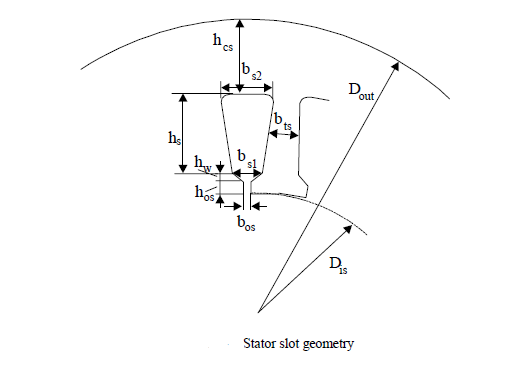

In [88]:
#Slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/slotshape.png', width=700, height=700)

In [214]:
from math import tan
Bt=1.6 #Tooth flux density (T) to prevent saturization in the tooth
Kfe=0.95 
b_ts=((Bg*Ts)/(Kfe*Bt))
h_os=0.012
h_w=0.001
b_s1=((pi*(Di+2*h_os+2*h_w))/Qs)-(b_ts)
b_s2=sqrt(4*(Asu*1e-6)*tan(pi/Qs))+(b_s1**2)
h_s=((2*(Asu*1e-6))/(b_s1+b_s2))
b_os=6*1e-3 
print('b_ts =',b_ts,'m')
print('b_s1 =',b_s1,'m')
print('h_os =',h_os,'m')
print('b_os =',b_os,'m')
print('h_w =',h_w,'m')
print('b_s2 =',b_s2,'m')
print('h_s =',h_s,'m')

b_ts = 0.008664863886476552 m
b_s1 = 0.014420588639727028 m
h_os = 0.012 m
b_os = 0.006 m
h_w = 0.001 m
b_s2 = 0.009108016336965936 m
h_s = 0.03855377186739679 m


In [97]:
Qr=58 #Rotor side slot numbers according to ABB standards for a 72 stator slot number and to have tooth width bigger that 1mm 
print('Rotor slot numbers=',Qr)

Rotor slot numbers= 58
